In [1]:
import pandas as pd
import numpy as np

mtcars = pd.read_csv('mtcars.csv')

In [2]:
X = mtcars.drop(columns=['am'])
y = mtcars['am'].values

In [3]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=10, random_state=100)

In [4]:
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.linear_model import LogisticRegression

In [5]:
preprocessor = ColumnTransformer(transformers=[
    ('drop_car_model', 'drop', [0]),
    ('standardizer', StandardScaler(), [1,2,3,4,5,6,7]),
    ('normalizer', MinMaxScaler(), [8,9,10])
])


In [6]:
pipeline = Pipeline(steps=[
    ('preprocessor',preprocessor),
    ('classifier', LogisticRegression(random_state=0, solver='liblinear'))
])

In [7]:
from sklearn.model_selection import GridSearchCV

params = [{'classifier__C': [0.00001,0.25,0.5,0.75,1,10,100,1000,10000],
           'classifier__penalty': ['l1','l2']}]

grid = GridSearchCV(pipeline,param_grid=params, n_jobs=-1, cv=5, scoring='accuracy',refit=True)
grid.fit(X_train,y_train)

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('preprocessor',
                                        ColumnTransformer(transformers=[('drop_car_model',
                                                                         'drop',
                                                                         [0]),
                                                                        ('standardizer',
                                                                         StandardScaler(),
                                                                         [1, 2,
                                                                          3, 4,
                                                                          5, 6,
                                                                          7]),
                                                                        ('normalizer',
                                                                         MinMaxScaler(),
                                                                         [8, 9,
                                                                          10])])),
                                       ('classifier',
                                        LogisticRegression(random_state=0,
                                                           solver='liblinear'))]),
             n_jobs=-1,
             param_grid=[{'classifier__C': [1e-05, 0.25, 0.5, 0.75, 1, 10, 100,
                                            1000, 10000],
                          'classifier__penalty': ['l1', 'l2']}],
             scoring='accuracy')

In [8]:
grid.best_params_

{'classifier__C': 0.25, 'classifier__penalty': 'l2'}

In [9]:
best_pipeline = grid.best_estimator_

In [10]:
y_pred = best_pipeline.predict(X_test)

In [26]:
from sklearn.metrics import accuracy_score,confusion_matrix, ConfusionMatrixDisplay, RocCurveDisplay, roc_curve, auc

accuracy_score(y_test,y_pred)

1.0

In [20]:
cm = confusion_matrix(y_test,y_pred)

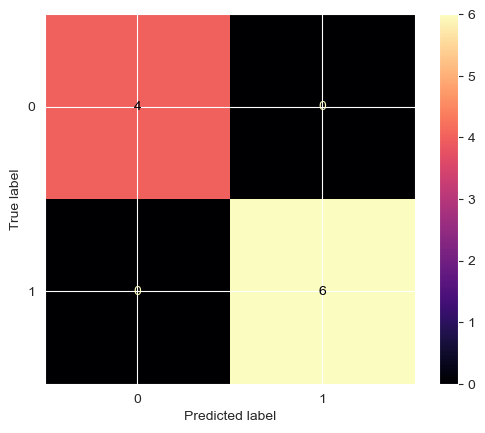

In [21]:
ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=[0,1]).plot(cmap='magma')

In [24]:
false_positive_rate ,true_positive_rate , thresholds = roc_curve(y_test,y_pred)

In [28]:
roc_area_under_curve = auc(false_positive_rate,true_positive_rate)

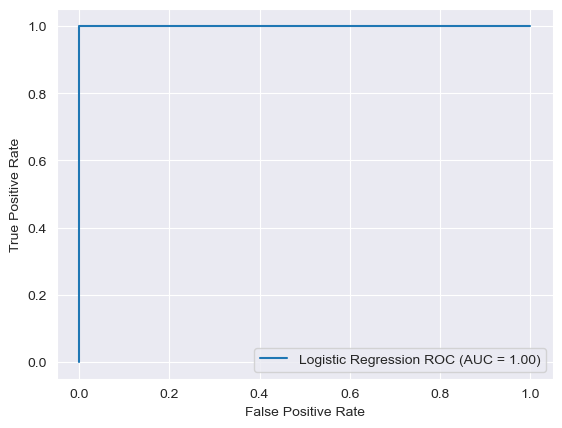

In [30]:
RocCurveDisplay(fpr=false_positive_rate,tpr=true_positive_rate,roc_auc=roc_area_under_curve, estimator_name='Logistic Regression ROC').plot()

In [14]:
# import joblib
# 
# joblib.dump(best_pipeline,'pipelines-bin/mtcars/dependent_variable_pipeline')